# Mini Project2 - Customer Segmentation - Marketing Strategy 
## By Madhu Nuthula

# Problem Statement
Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Here is the requirement of a retail company - to segment the customers based on the total amount they spent so the company can market particular products based on the customer's expenditure level to maximise the sales and ROI(Return on Investment)

# Market Study
Marketing is crucial for your company’s success – you have to spend money to make money. If you’re not marketing your business, you’re not making progress.
According to the U.S. Small Business Administration, small businesses generally want to spend between 7-8% of their revenue on marketing
Deloitte found that both B2B product and B2C service industries spend around 10% of their budget on marketing
In comparison, B2C product and B2B service industries spent as much as 15-18% on their marketing.

## Return on Investment (ROI)
A good marketing ROI is 5:1 — or $5 for every $1 spent.
An outstanding ROI is 10:1, where you get $10 for every $1 spent.




# Attributes
## People
ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

## Products
MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

## Promotion
NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

## Place
NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

## Target
#### Customer segmentation based on the amount spent into three levels Low, Med, High

In [887]:
import warnings
warnings.filterwarnings('ignore')

In [888]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn import svm
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [889]:
df = pd.read_csv(r"C:\Users\Raveena's PC\Documents\Data_Science\Mini_Project_2_Madhu\Data_mini_project2\Mini2 - Marketing - Data\marketing_campaign.csv", sep='\t')

In [890]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [891]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [892]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [893]:
df.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [894]:
df.Income.mean()

52247.25135379061

In [895]:
df.Income = df.Income.replace(np.nan, df.Income.mean())

In [896]:
df.Income.isnull().sum()

0

In [897]:
df.shape

(2240, 29)

In [898]:
df[["AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2"]].sum()

AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    163
AcceptedCmp1    144
AcceptedCmp2     30
dtype: int64

In [899]:
#finding if it have different values
df["Z_CostContact"].unique(), df["Z_Revenue"].unique()

(array([3], dtype=int64), array([11], dtype=int64))

In [900]:
#removing the columns that have same value through out the rows
df = df.drop(columns = ["Z_CostContact", "Z_Revenue"])

In [901]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [902]:
df_corr = df.corr()

<AxesSubplot:>

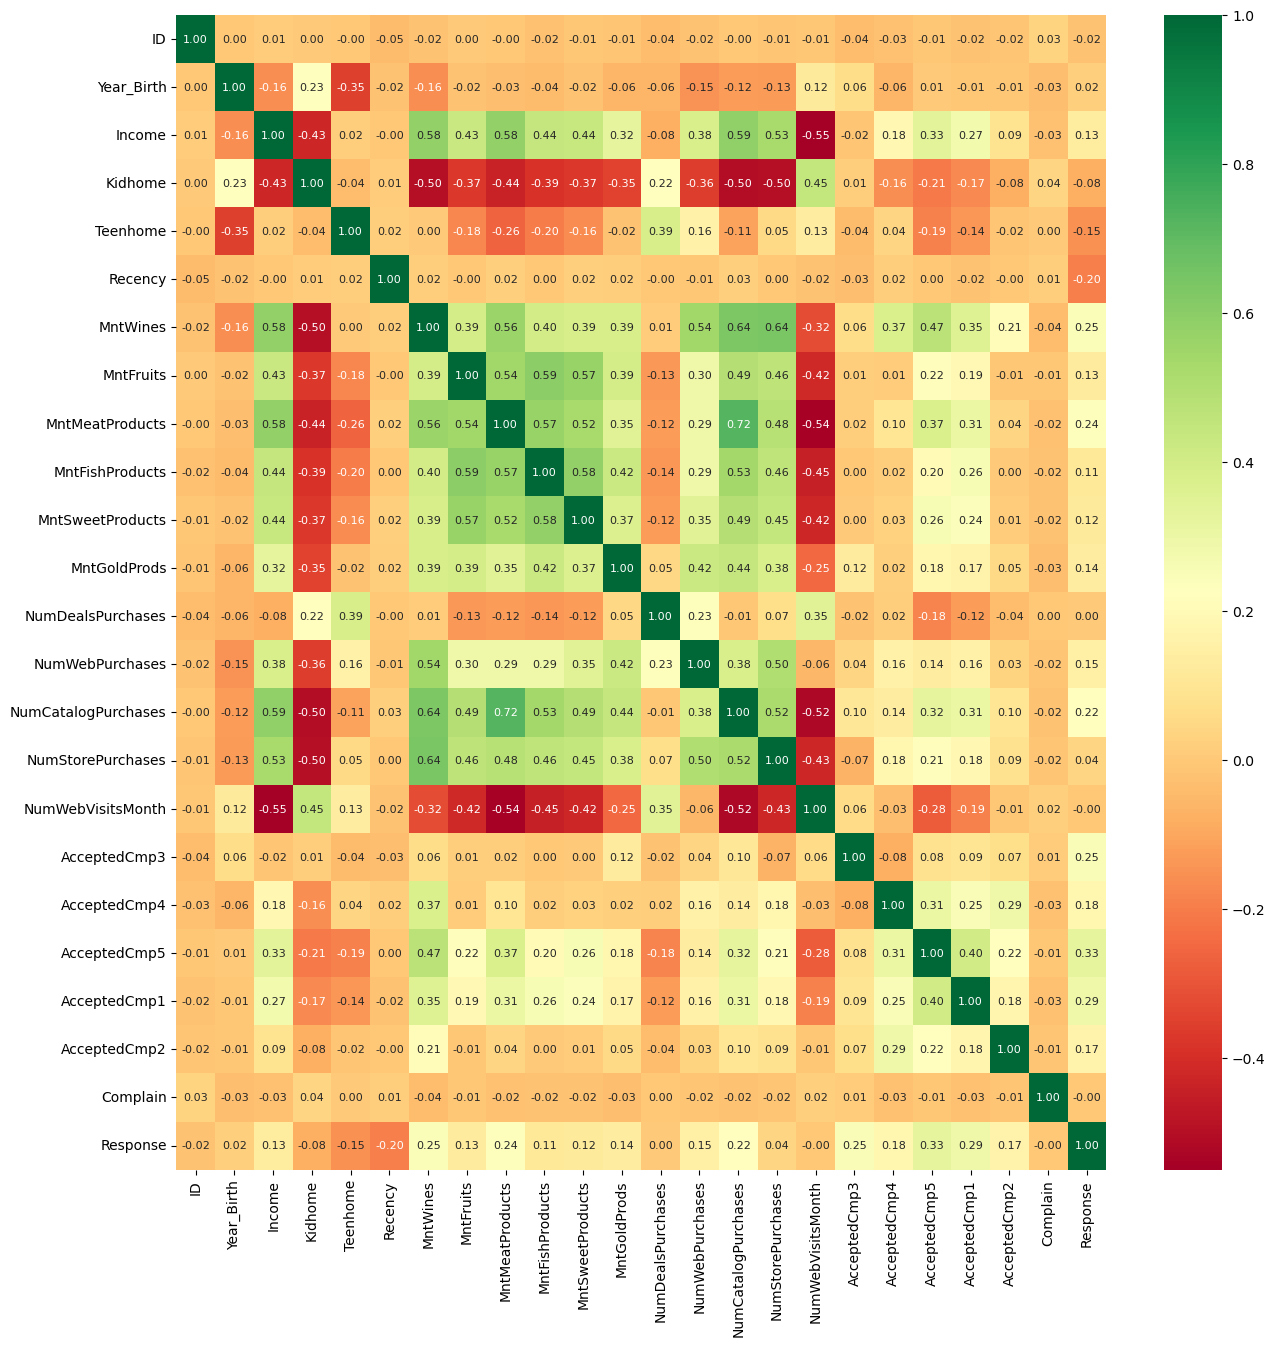

In [903]:
plt.subplots(figsize=(15, 15))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 8})


In [904]:
# creating new column adding money spent on various catagories to "total _spent" column
df["total_Spent"] = df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum(axis=1)

In [905]:
df["total_Spent"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: total_Spent, Length: 2240, dtype: int64

In [906]:
#Eliminating the columns money spent on various catagories
df = df.drop(columns = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds'])

In [907]:
#verify if the columns been dropped
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'total_Spent'],
      dtype='object')

Text(0.5, 1.0, 'Income Distribution')

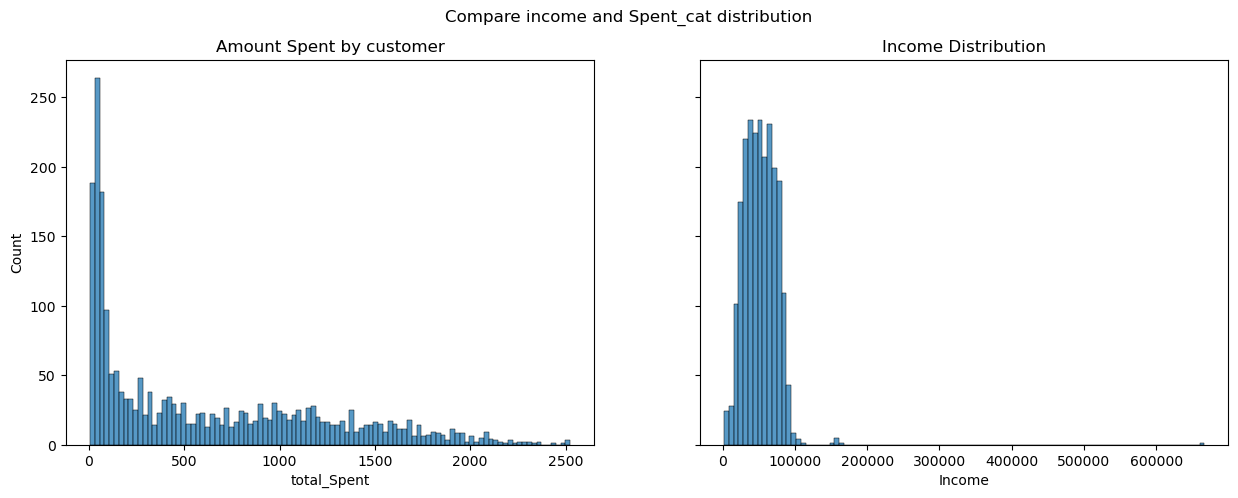

In [908]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Compare income and Spent_cat distribution')

sns.histplot(ax = ax[0], x = df["total_Spent"], bins = 100).set_title("Amount Spent by customer")


sns.histplot(ax = ax[1], x = df["Income"], bins = 100).set_title("Income Distribution")


Text(0.5, 1.0, 'Income vs Amount spent')

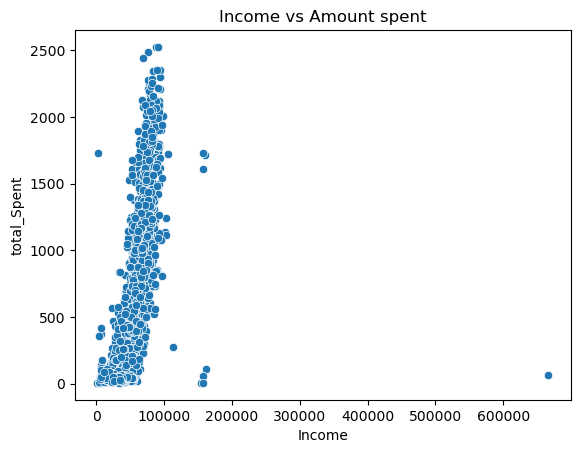

In [910]:
sns.scatterplot(x = df["Income"], y = df["total_Spent"]).set_title("Income vs Amount spent")

Text(0.5, 1.0, 'Amount Spent by customer')

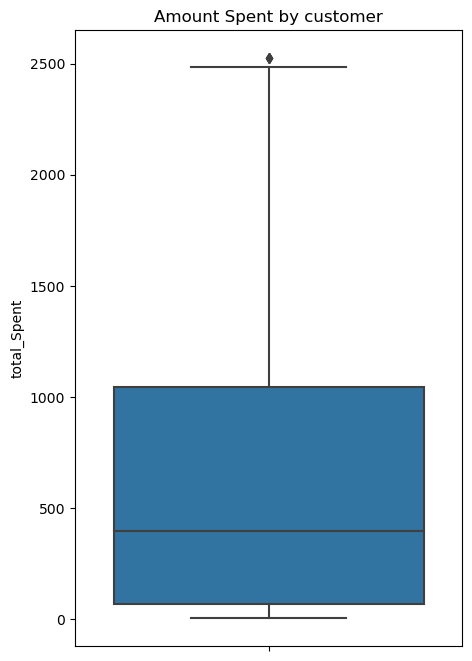

In [911]:
plt.figure(figsize=(5, 8))
sns.boxplot(y = df["total_Spent"]).set_title("Amount Spent by customer")


Text(0.5, 1.0, 'Income Distribution')

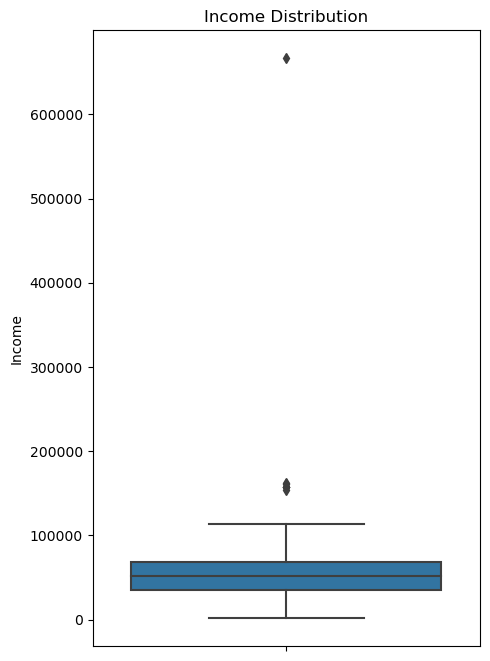

In [912]:
plt.figure(figsize=(5, 8))
sns.boxplot(y = df["Income"]).set_title("Income Distribution")

# Remove Outliers

In [913]:
sum(df.Income >120000)

8

In [914]:
# Remove outliers by capping to 120000
df['Income'].mask(df['Income'] >120000 ,120000, inplace=True)

In [915]:
sum(df.Income >120000)

0

In [916]:
sum(df["total_Spent"] >2500)

3

In [917]:
df["total_Spent"].mask(df["total_Spent"] >2500 ,2500, inplace=True)

# Categorising total_spent in to Low, Med, High levels

In [918]:
df.total_Spent.describe()

count    2240.000000
mean      605.765179
std       602.144650
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2500.000000
Name: total_Spent, dtype: float64

In [919]:
df.total_Spent.quantile([.33,.66])

0.33    108.87
0.66    813.00
Name: total_Spent, dtype: float64

In [920]:
# passiging on conditions and categories based on 33th 66th percentiles to creat a Spent_cat column
Conditions1 = [
    (df['total_Spent'] < 108.87),
    (df['total_Spent'] >= 108.87) & (df['total_Spent'] < 813),
    (df['total_Spent'] >= 813)
]
Spent_cat = ['L-Spent', 'M-Spent', 'H-Spent']
df['Spent_cat'] = np.select(Conditions1, Spent_cat)

In [1016]:
#verify
df['Spent_cat'].value_counts()

0    763
1    739
2    738
Name: Spent_cat, dtype: int64

In [922]:
# drop the total_Spent column and verify
df = df.drop(columns = "total_Spent")
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Spent_cat'],
      dtype='object')

In [923]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent_cat
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,3,...,4,7,0,0,0,0,0,0,1,H-Spent
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,2,...,2,5,0,0,0,0,0,0,0,L-Spent
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,1,...,10,4,0,0,0,0,0,0,0,M-Spent
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,2,...,4,6,0,0,0,0,0,0,0,L-Spent
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,5,...,6,5,0,0,0,0,0,0,0,M-Spent


# Customer age conversion

In [924]:
#creating an Age column
df["Age"] = 2023 - df["Year_Birth"]

In [925]:
df = df.drop(columns = ["Year_Birth"])
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Spent_cat', 'Age'],
      dtype='object')

In [926]:
df.Age.describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

In [927]:
#partnership based column with yes or no as values
df["Partner"]=df["Marital_Status"].replace({"Married":"Yes", "Together":"Yes", "Absurd":"No", "Widow":"No", "YOLO":"No", "Divorced":"No", "Single":"No","Alone":"No"})

In [928]:
#Categorize education
df["Education_Level"]=df["Education"].replace({"Basic":"Basic","2n Cycle":"2n Cycle", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [929]:
#remove columns not required
df = df.drop(columns = ["Education", "Marital_Status"])
df.columns

Index(['ID', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Spent_cat', 'Age', 'Partner',
       'Education_Level'],
      dtype='object')

In [930]:
# Change the date to year and convert to no.of years customer is with the company
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [931]:
#extract only year
df['NumYears'] = df['Dt_Customer'].dt.strftime('%Y')

In [932]:
#convert year from string to int format
df['NumYears'] =df['NumYears'].astype("int")

In [933]:
# Convert to number year
df['NumYears'] = 2023 - df['NumYears'].values

In [934]:
df = df.drop(columns = "Dt_Customer")

In [935]:
#Converting to numerical values
df['Partner']=df['Partner'].replace({"No":"1","Yes":"2"})

In [936]:
#Converting to numerical values
df['Education_Level']= df['Education_Level'].replace({'Postgraduate':"3",'2n Cycle':"3", 'Graduate':'2', 'Basic':'1'})

In [937]:
#Converting to type "int"
df['Partner']=df['Partner'].astype("int")
df['Education_Level']= df['Education_Level'].astype("int")

In [938]:
#remove ID column
df = df.drop(columns = "ID")

In [939]:
df.head()

,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent_cat,Age,Partner,Education_Level,NumYears
0,58138.0,0,0,58,3,8,10,4,7,0,...,0,0,0,0,1,H-Spent,66,1,2,11
1,46344.0,1,1,38,2,1,1,2,5,0,...,0,0,0,0,0,L-Spent,69,1,2,9
2,71613.0,0,0,26,1,8,2,10,4,0,...,0,0,0,0,0,M-Spent,58,2,2,10
3,26646.0,1,0,26,2,2,0,4,6,0,...,0,0,0,0,0,L-Spent,39,2,2,9
4,58293.0,1,0,94,5,5,3,6,5,0,...,0,0,0,0,0,M-Spent,42,2,3,9


# Modeling using Data as is 

In [940]:
label_encoder = preprocessing.LabelEncoder()
df['Spent_cat']= label_encoder.fit_transform(df['Spent_cat'])

In [941]:
df['Spent_cat'].unique()

array([0, 1, 2])

<AxesSubplot:>

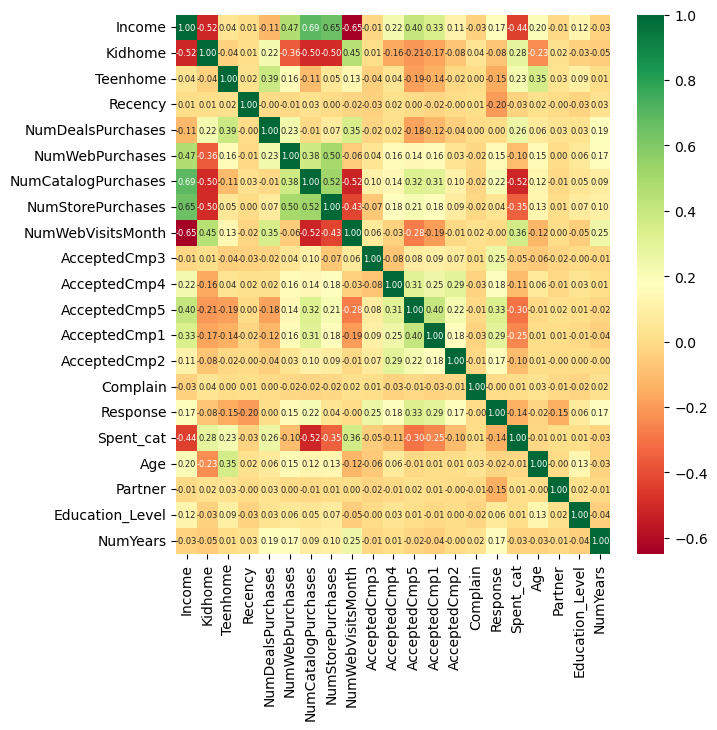

In [942]:
plt.subplots(figsize= (7,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 6})

In [943]:
Xa = df.drop(columns = "Spent_cat")

ya = df['Spent_cat']

#split in to  Training/Test sets and their proportions
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size=0.20, random_state=42)

## Logistic Regression

In [944]:
clf_lg_a = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 10000)
clf_lg_a.fit(Xa_train, ya_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [945]:
clf_lg_a.score(Xa_test, ya_test)

0.8861607142857143

In [946]:
cross_val_score(clf_lg_a, Xa_train, ya_train, cv=10)

array([0.81666667, 0.83333333, 0.81564246, 0.89944134, 0.84357542,
       0.7877095 , 0.82681564, 0.83798883, 0.84357542, 0.88268156])

In [947]:
predict_lg_a = clf_lg_a.predict(Xa_test)


Text(0.5, 1.0, 'Logistic Regression')

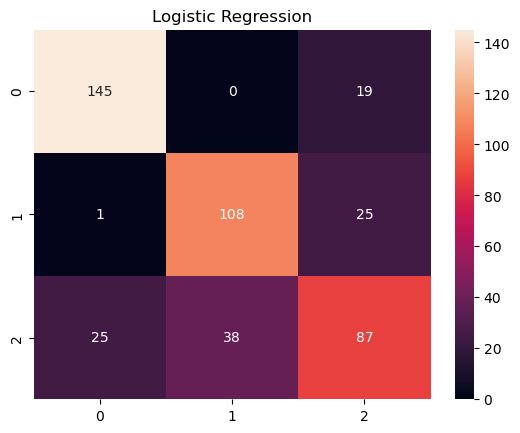

In [948]:
con_mat_lg_a = confusion_matrix(ya_test, predict_lg_a)
sns.heatmap(con_mat_a, annot = True, fmt='d').set_title('Logistic Regression')

In [949]:
print(classification_report(ya_test, predict_lg_a, target_names= ["class_1", "class_2", "Class_3"]))

              precision    recall  f1-score   support

     class_1       0.90      0.90      0.90       164
     class_2       0.91      0.96      0.93       134
     Class_3       0.85      0.81      0.83       150

    accuracy                           0.89       448
   macro avg       0.89      0.89      0.89       448
weighted avg       0.89      0.89      0.89       448



## Support Vector Machine

In [950]:
clf_svma = svm.SVC(random_state=42)

clf_svma.fit(Xa_train, ya_train)

SVC(random_state=42)

In [951]:
cross_val_score(clf_svma, Xa_train, ya_train, cv=10)

array([0.74444444, 0.76111111, 0.72625698, 0.7150838 , 0.75977654,
       0.72625698, 0.75977654, 0.73184358, 0.7150838 , 0.77094972])

In [952]:
svm_predicta = clf_svma.predict(Xa_test)

Text(0.5, 1.0, 'Support Vector Machine')

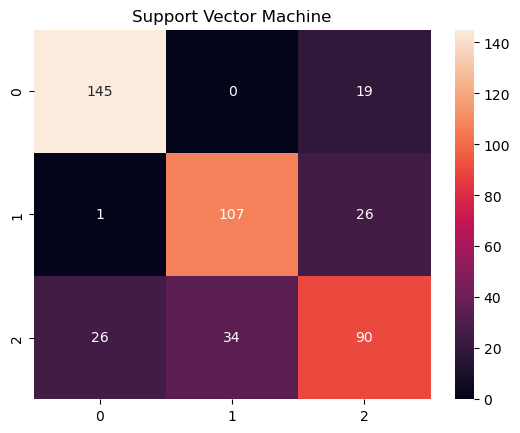

In [953]:
con_mat_svm_a = confusion_matrix(ya_test, svm_predicta)
sns.heatmap(con_mat_svm_a, annot = True, fmt='d').set_title('Support Vector Machine')

In [954]:
print(classification_report(ya_test, svm_predicta, target_names= ["class_1", "class_2", "Class_3"]))

              precision    recall  f1-score   support

     class_1       0.84      0.88      0.86       164
     class_2       0.76      0.80      0.78       134
     Class_3       0.67      0.60      0.63       150

    accuracy                           0.76       448
   macro avg       0.76      0.76      0.76       448
weighted avg       0.76      0.76      0.76       448



## Naive Bayes

In [955]:
clf_nb_a = GaussianNB().fit(Xa_train, ya_train)

In [956]:
cross_val_score(clf_svma, Xa_train, ya_train, cv=10)

array([0.74444444, 0.76111111, 0.72625698, 0.7150838 , 0.75977654,
       0.72625698, 0.75977654, 0.73184358, 0.7150838 , 0.77094972])

In [957]:
nb_predicta = clf_nb_a.predict(Xa_test)

Text(0.5, 1.0, 'Naive Bayes')

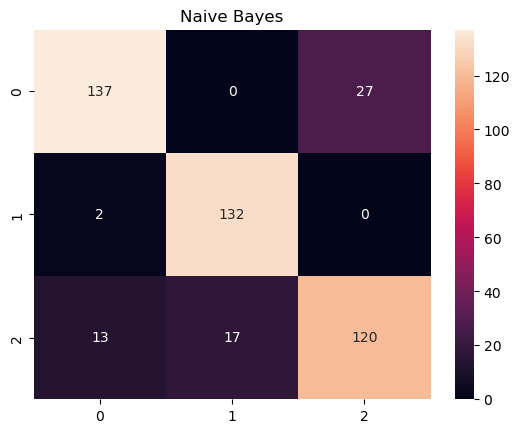

In [958]:
con_mat_nb_a = confusion_matrix(ya_test, nb_predicta)
sns.heatmap(con_mat_nb_a, annot = True, fmt='d').set_title('Naive Bayes')

In [959]:
print(classification_report(ya_test, nb_predicta, target_names= ["class_1", "class_2", "Class_3"]))

              precision    recall  f1-score   support

     class_1       0.90      0.84      0.87       164
     class_2       0.89      0.99      0.93       134
     Class_3       0.82      0.80      0.81       150

    accuracy                           0.87       448
   macro avg       0.87      0.87      0.87       448
weighted avg       0.87      0.87      0.87       448



In [960]:
clf_nb_a.predict_proba(Xa_test)

array([[1.37500841e-03, 6.89780682e-16, 9.98624992e-01],
       [2.78159743e-02, 4.82262143e-13, 9.72184026e-01],
       [4.64703724e-09, 9.99291830e-01, 7.08165633e-04],
       ...,
       [9.52209755e-01, 1.41288675e-31, 4.77902449e-02],
       [2.53594768e-01, 5.87257468e-03, 7.40532658e-01],
       [7.08564765e-05, 9.87808213e-01, 1.21209308e-02]])

# Add related features to minimise no.of features

In [961]:
# Convert no.of various types of purchases to a Purchases_times
df["Purchases_times"] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth']].sum(axis = 1)

In [962]:
# Convert no.of various Accepted campaigns to a "Cmp_accepted" column
df["Cmp_accepted"] = df[['AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', "Response"]].sum(axis = 1)



In [963]:
# Convert kidhome, Teen home to "Child_home"
df["Child_home"] = df[['Kidhome', 'Teenhome']].sum(axis = 1)

In [964]:
#Drop unwanted columns
df = df.drop(columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth','AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Kidhome', 'Teenhome'])


In [965]:
df.head()

,Income,Recency,Complain,Spent_cat,Age,Partner,Education_Level,NumYears,Purchases_times,Cmp_accepted,Child_home
0,58138.0,58,0,0,66,1,2,11,32,1,0
1,46344.0,38,0,1,69,1,2,9,11,0,2
2,71613.0,26,0,2,58,2,2,10,25,0,0
3,26646.0,26,0,1,39,2,2,9,14,0,1
4,58293.0,94,0,2,42,2,3,9,24,0,1


In [966]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Income           2240 non-null   float64
 1   Recency          2240 non-null   int64  
 2   Complain         2240 non-null   int64  
 3   Spent_cat        2240 non-null   int32  
 4   Age              2240 non-null   int64  
 5   Partner          2240 non-null   int32  
 6   Education_Level  2240 non-null   int32  
 7   NumYears         2240 non-null   int32  
 8   Purchases_times  2240 non-null   int64  
 9   Cmp_accepted     2240 non-null   int64  
 10  Child_home       2240 non-null   int64  
dtypes: float64(1), int32(4), int64(6)
memory usage: 157.6 KB


# Visualisation

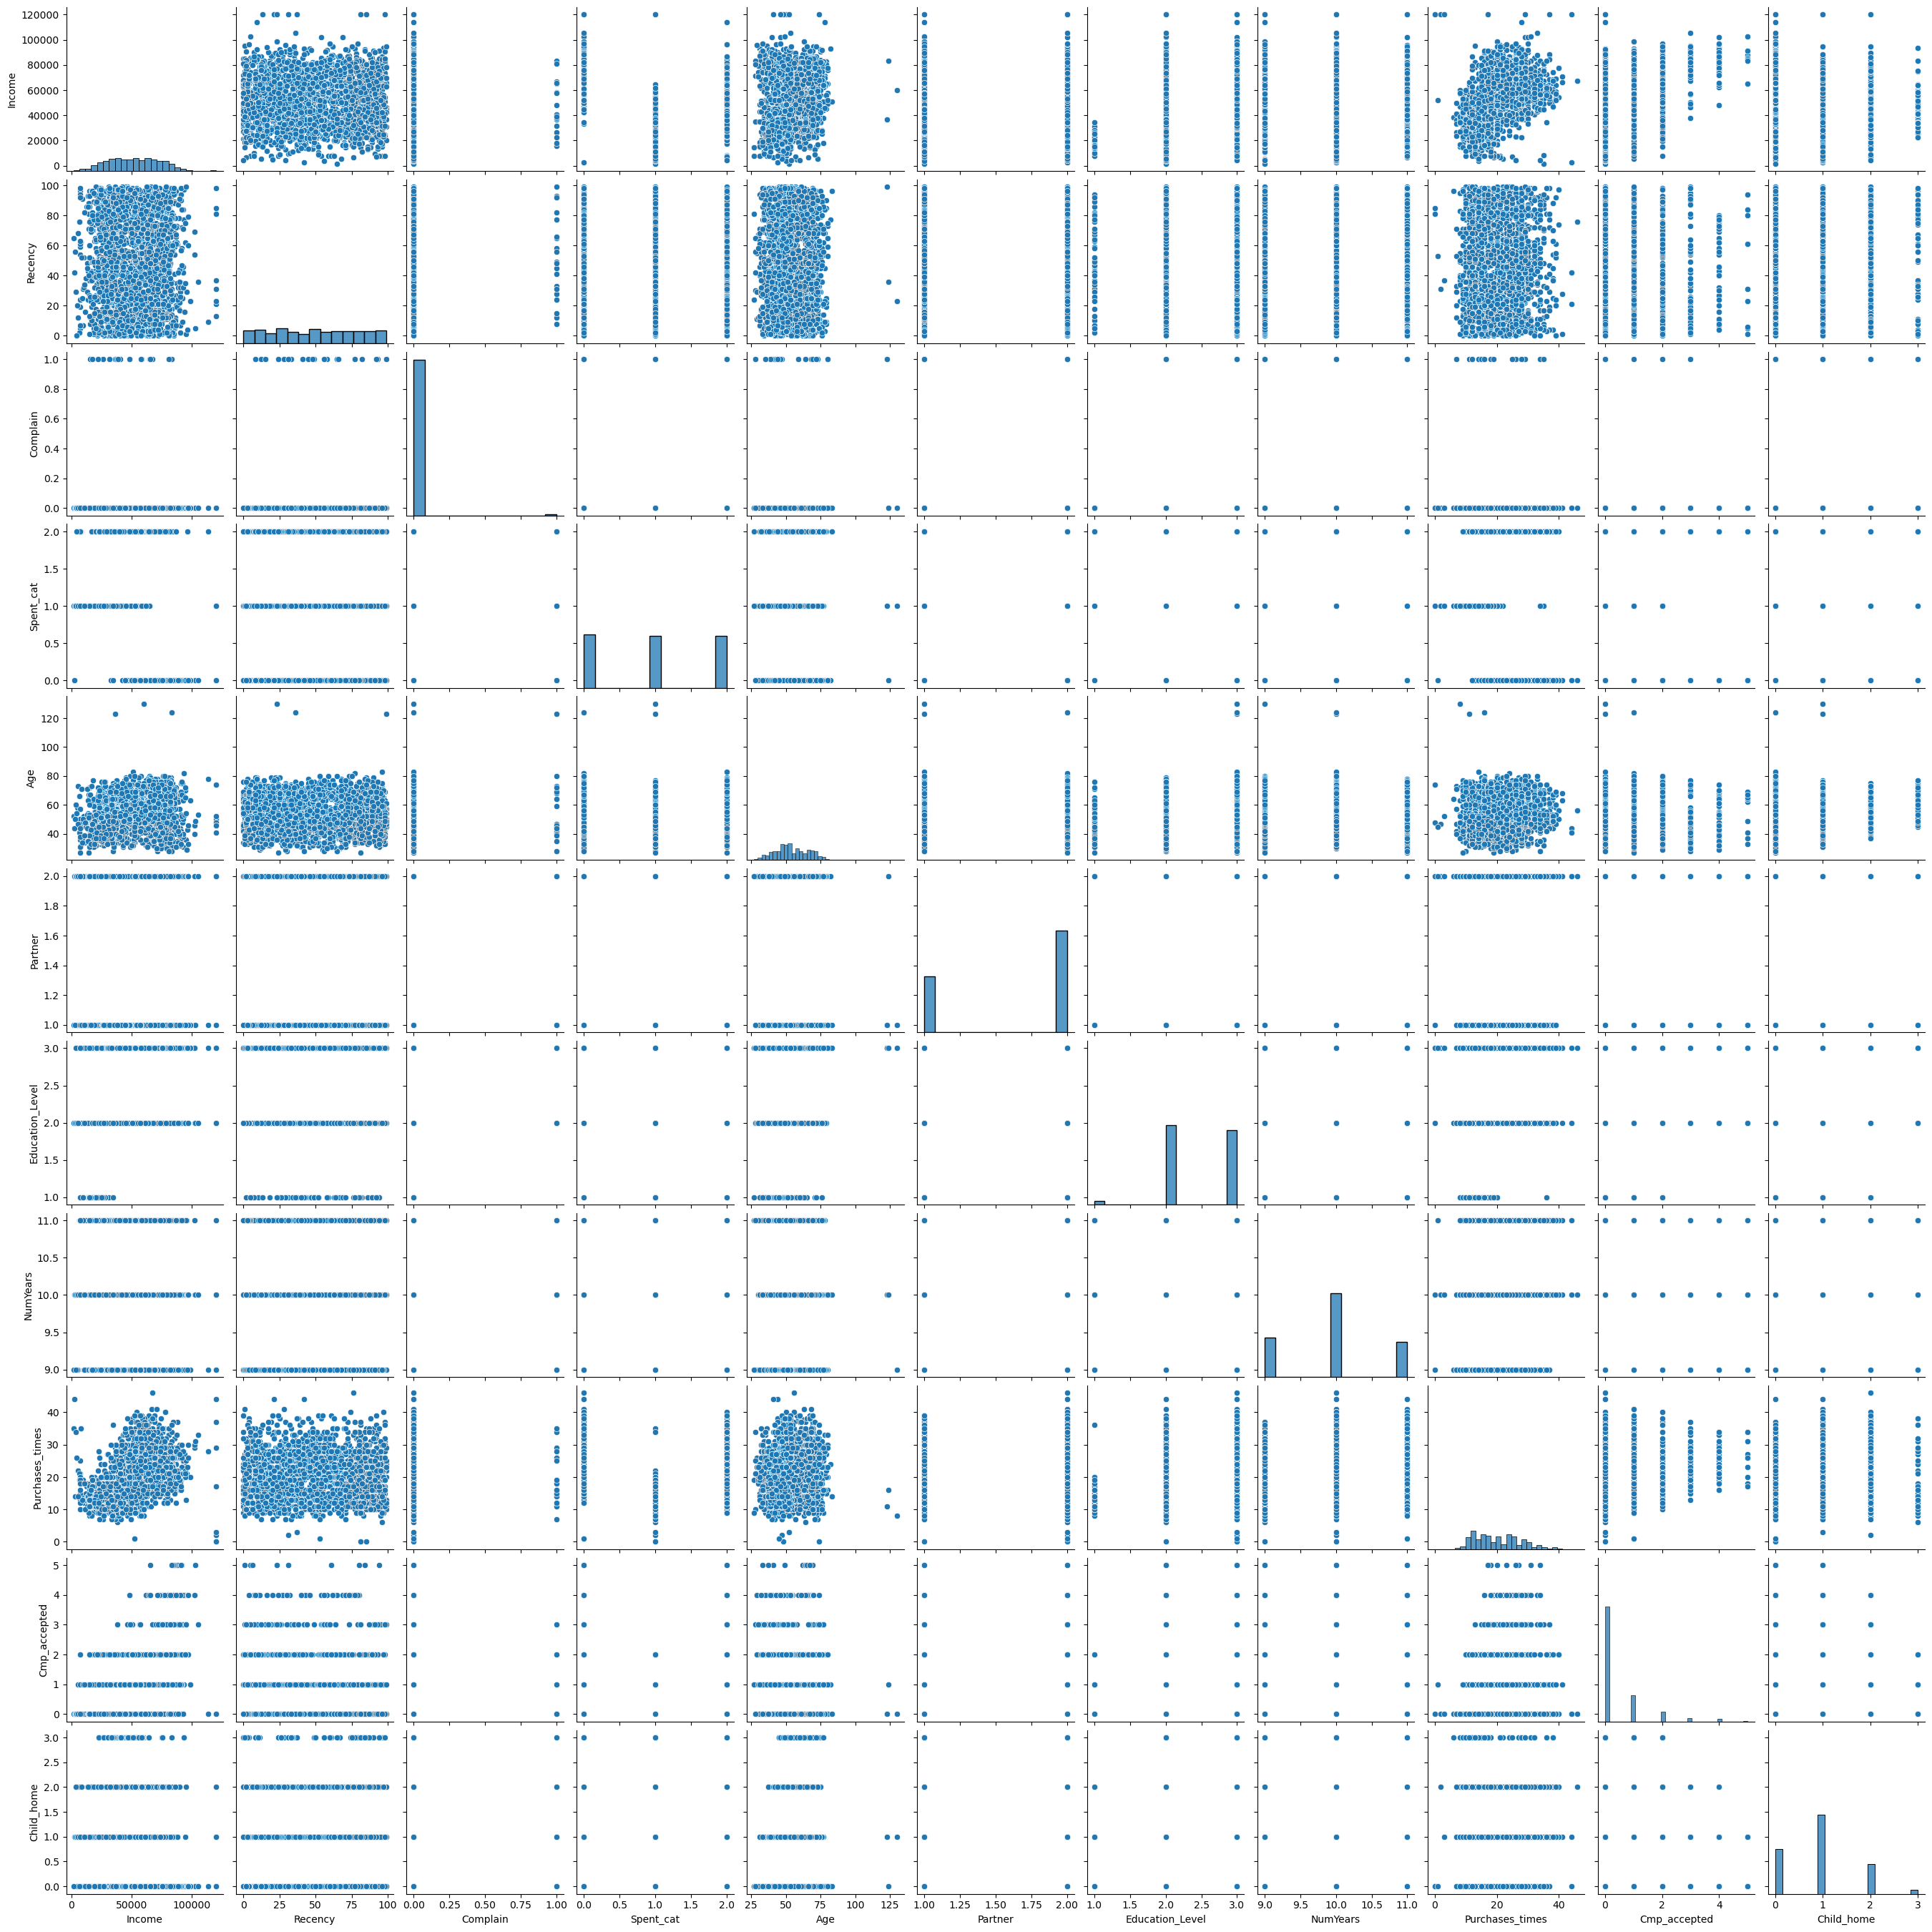

In [967]:
sns.pairplot(df)

Text(0.5, 1.0, 'Distribution of Spent Category')

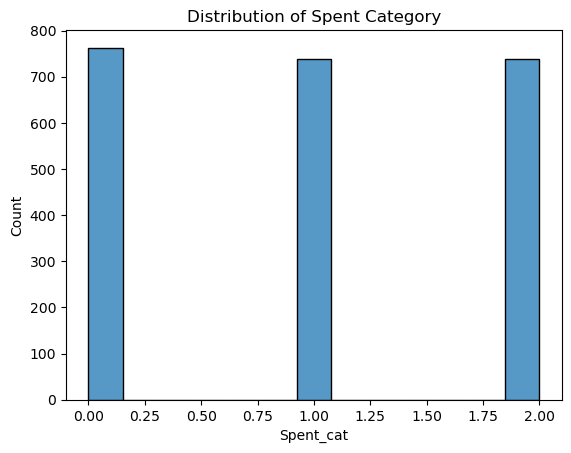

In [968]:
#To undesrstand if the target is evenly classified
sns.histplot(df["Spent_cat"]).set_title("Distribution of Spent Category")

Text(0.5, 1.0, 'Distribution of Income')

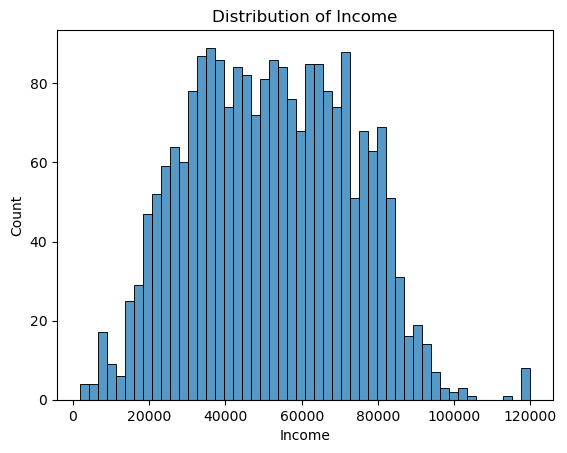

In [969]:
sns.histplot(df["Income"], bins = 50).set_title("Distribution of Income")

Text(0.5, 1.0, 'Correlation with 11 features')

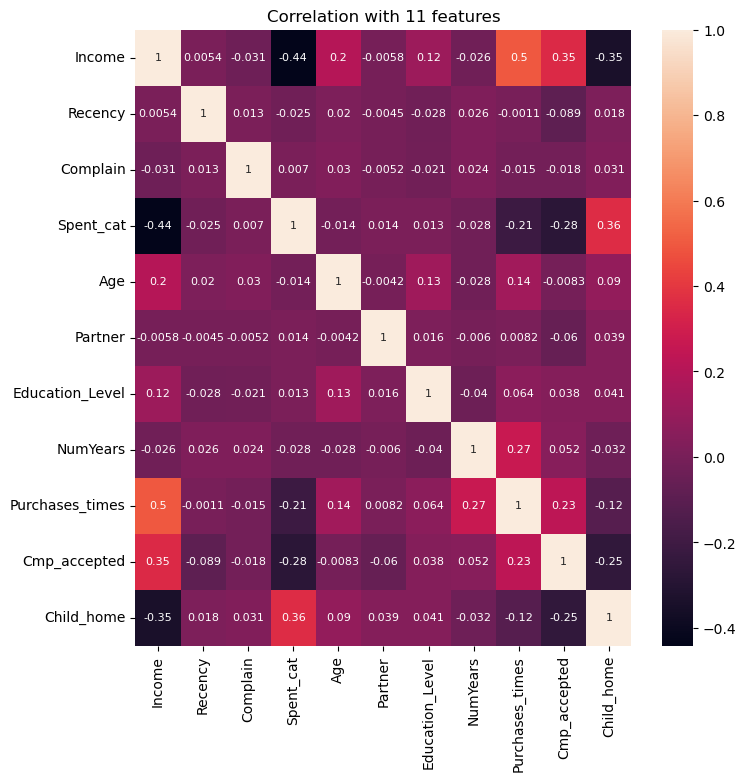

In [970]:
plt.subplots(figsize = (8,8))
sns.heatmap(df.corr(), annot = True, annot_kws={'size': 8}).set_title("Correlation with 11 features")

# Setting up All columns as Features and 'Spent_cat' Target variables

In [971]:
X = df.drop(columns = "Spent_cat")

In [972]:
y = df['Spent_cat']

In [973]:
#split in to  Training/Test sets and their proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Setting up variables with correlation over .20 as Features and 'Spent_cat' as Target variables

In [974]:
df.columns

Index(['Income', 'Recency', 'Complain', 'Spent_cat', 'Age', 'Partner',
       'Education_Level', 'NumYears', 'Purchases_times', 'Cmp_accepted',
       'Child_home'],
      dtype='object')

In [975]:
X1 = df[['Income', 'Child_home', 'Purchases_times', 'Cmp_accepted']]

In [976]:
y1 = df['Spent_cat']

In [977]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

## Logistic Regression with All Features

In [978]:
clf_lg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 10000)
clf_lg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [979]:
clf_lg.score(X_test, y_test)

0.8348214285714286

In [980]:
cross_val_score(clf_lg, X_train, y_train, cv=10)

array([0.85      , 0.84444444, 0.7877095 , 0.8547486 , 0.70949721,
       0.82122905, 0.81564246, 0.76536313, 0.81564246, 0.8603352 ])

In [981]:
predict_lg = clf_lg.predict(X_test)


Text(0.5, 1.0, 'Logistic Regression')

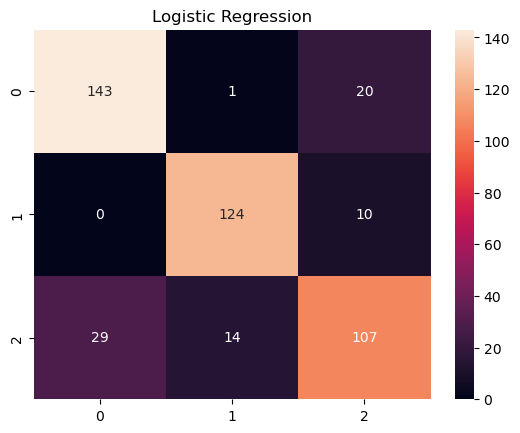

In [982]:
con_mat_lg = confusion_matrix(y_test, predict_lg)
sns.heatmap(con_mat_lg, annot = True, fmt='d').set_title("Logistic Regression")

In [983]:
print(classification_report(y_test, predict_lg, target_names= ["class_1", "class_2", "Class_3"]))

              precision    recall  f1-score   support

     class_1       0.83      0.87      0.85       164
     class_2       0.89      0.93      0.91       134
     Class_3       0.78      0.71      0.75       150

    accuracy                           0.83       448
   macro avg       0.83      0.84      0.84       448
weighted avg       0.83      0.83      0.83       448



## Logistic Regression with Limited features

In [984]:
clf1_lg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 10000)
clf1_lg.fit(X1_train, y1_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [985]:
clf1_lg.score(X1_test, y1_test)

0.6808035714285714

In [986]:
cross_val_score(clf1_lg, X1_train, y1_train, cv=10)

array([0.7       , 0.33333333, 0.67039106, 0.42458101, 0.32960894,
       0.72067039, 0.67597765, 0.75418994, 0.40782123, 0.33519553])

In [987]:
predict_lg1 = clf1_lg.predict(X1_test)


Text(0.5, 1.0, 'Logistic Regression')

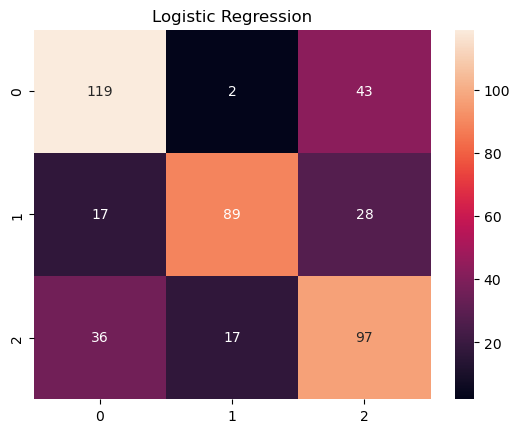

In [988]:
con_mat_lg1 = confusion_matrix(y1_test, predict_lg1)
sns.heatmap(con_mat_lg1, annot = True, fmt='d').set_title("Logistic Regression")

In [989]:
print(classification_report(y1_test, predict_lg1, target_names= ["class_1", "class_2", "Class_3"]))

              precision    recall  f1-score   support

     class_1       0.69      0.73      0.71       164
     class_2       0.82      0.66      0.74       134
     Class_3       0.58      0.65      0.61       150

    accuracy                           0.68       448
   macro avg       0.70      0.68      0.68       448
weighted avg       0.69      0.68      0.68       448



# Creating, fitting and testing Model - SVM

In [990]:
clf_svm = svm.SVC(random_state=42)

In [991]:
clf_svm.fit(X_train, y_train)

SVC(random_state=42)

In [992]:
cross_val_score(clf_svm, X_train, y_train, cv=10)

array([0.74444444, 0.76111111, 0.72625698, 0.7150838 , 0.75977654,
       0.72625698, 0.75977654, 0.73184358, 0.72067039, 0.77094972])

In [993]:
svm_predict = clf_svm.predict(X_test)

Text(0.5, 1.0, 'Support Vector Machines')

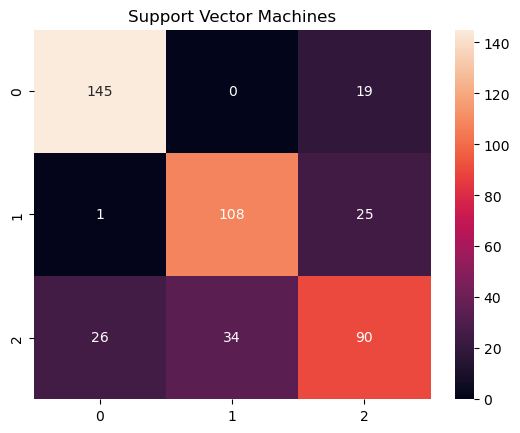

In [994]:
con_mat_svm = confusion_matrix(y_test, svm_predict)
sns.heatmap(con_mat_svm, annot = True, fmt='d').set_title("Support Vector Machines")

In [995]:
print(classification_report(y_test, svm_predict, target_names= ["class_1", "class_2", "Class_3"]))

              precision    recall  f1-score   support

     class_1       0.84      0.88      0.86       164
     class_2       0.76      0.81      0.78       134
     Class_3       0.67      0.60      0.63       150

    accuracy                           0.77       448
   macro avg       0.76      0.76      0.76       448
weighted avg       0.76      0.77      0.76       448



# SVM with limited features

In [996]:
clf1_svm = svm.SVC(random_state=42)
clf1_svm.fit(X1_train, y1_train)

SVC(random_state=42)

In [997]:
cross_val_score(clf1_svm, X1_train, y1_train, cv=10)

array([0.74444444, 0.76111111, 0.72625698, 0.72625698, 0.75418994,
       0.72625698, 0.75977654, 0.73184358, 0.70949721, 0.77653631])

In [998]:
svm_predict1 = clf1_svm.predict(X1_test)

Text(0.5, 1.0, 'Support Vector Machines')

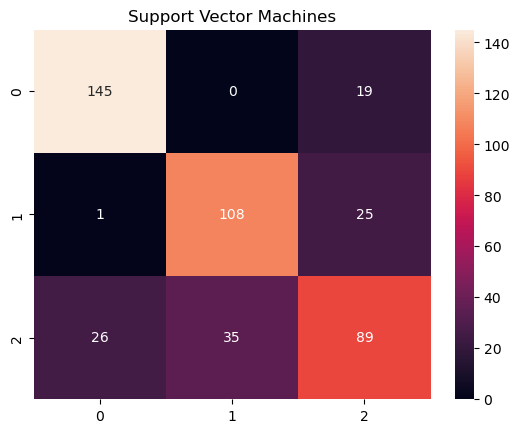

In [999]:
con_mat_svm1 = confusion_matrix(y_test, svm_predict1)
sns.heatmap(con_mat_svm1, annot = True, fmt='d').set_title("Support Vector Machines")

In [1000]:
print(classification_report(y1_test, svm_predict1, target_names= ["class_1", "class_2", "Class_3"]))

              precision    recall  f1-score   support

     class_1       0.84      0.88      0.86       164
     class_2       0.76      0.81      0.78       134
     Class_3       0.67      0.59      0.63       150

    accuracy                           0.76       448
   macro avg       0.76      0.76      0.76       448
weighted avg       0.76      0.76      0.76       448



# Using Grid Search CV - Best Estimator For SVM

In [1001]:
#Tried to use this but was so long that even after 2 days it was still running. So avoided it

# Creating, fitting and testing Model - Naive Bayes

In [1002]:
clf_nb = GaussianNB().fit(X_train, y_train)

In [1003]:
nb_predict = clf_nb.predict(X_test)

In [1004]:
cross_val_score(clf_nb, X_train, y_train, cv=10)

array([0.86666667, 0.86666667, 0.8547486 , 0.84916201, 0.86592179,
       0.88268156, 0.8547486 , 0.83798883, 0.82122905, 0.89385475])

Text(0.5, 1.0, 'Naive Bayes')

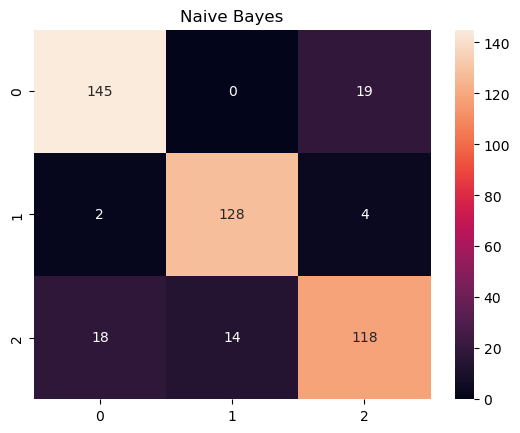

In [1005]:
con_mat_nb = confusion_matrix(y_test, nb_predict)
sns.heatmap(con_mat_nb, annot = True, fmt='d').set_title("Naive Bayes")

In [1006]:
print(classification_report(y_test, nb_predict, target_names= ["class_1", "class_2", "Class_3"]))

              precision    recall  f1-score   support

     class_1       0.88      0.88      0.88       164
     class_2       0.90      0.96      0.93       134
     Class_3       0.84      0.79      0.81       150

    accuracy                           0.87       448
   macro avg       0.87      0.88      0.87       448
weighted avg       0.87      0.87      0.87       448



# Naive Bayes with limited features

In [1007]:
clf1_nb = GaussianNB().fit(X1_train, y1_train)

In [1008]:
nb_predict1 = clf1_nb.predict(X1_test)

In [1009]:
cross_val_score(clf1_nb, X1_train, y1_train, cv=10)

array([0.86666667, 0.86666667, 0.84357542, 0.83798883, 0.8603352 ,
       0.87150838, 0.84916201, 0.84916201, 0.83798883, 0.89944134])

Text(0.5, 1.0, 'Naive Bayes')

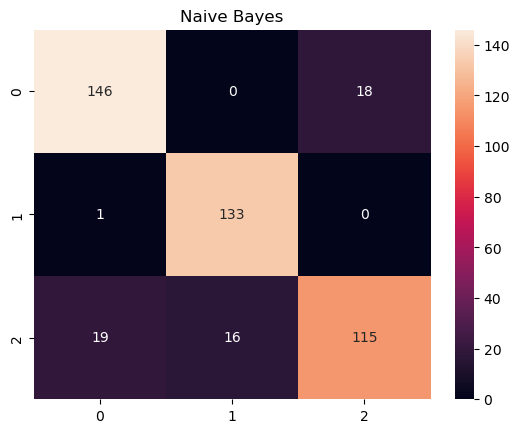

In [1010]:
con_mat_nb1 = confusion_matrix(y1_test, nb_predict1)
sns.heatmap(con_mat_nb1, annot = True, fmt='d').set_title("Naive Bayes")

In [1011]:
print(classification_report(y1_test, nb_predict1, target_names= ["class_1", "class_2", "Class_3"]))

              precision    recall  f1-score   support

     class_1       0.88      0.89      0.88       164
     class_2       0.89      0.99      0.94       134
     Class_3       0.86      0.77      0.81       150

    accuracy                           0.88       448
   macro avg       0.88      0.88      0.88       448
weighted avg       0.88      0.88      0.88       448



In [1012]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [1013]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [1014]:
knn_predict = knn.predict(X_test)

In [1015]:
print(classification_report(y_test, knn_predict, target_names= ["class_1", "class_2", "Class_3"]))

              precision    recall  f1-score   support

     class_1       0.83      0.85      0.84       164
     class_2       0.72      0.70      0.71       134
     Class_3       0.61      0.61      0.61       150

    accuracy                           0.73       448
   macro avg       0.72      0.72      0.72       448
weighted avg       0.72      0.73      0.73       448



# Conclusion:
### Naive Bayes with 4 Features gives the best accuracy of 0.88 

Since we can target the targeted audience with 88% accurately segmented customers;
The proposed model will help:

Improves customer experience and satisfaction

Increase turnover

Stakeholder can get high ROI

Can invest with confidence in Marketing

# References:
https://www.kaggle.com/datasets/whenamancodes/customer-personality-analysis

https://www.kaggle.com/code/mauricioasperti/automobile-customer-segmentation-classification

https://www.synx.com.au/blog/what-percentage-of-revenue-should-you-spend-on-marketing
